<div style='background-color:orange'>
<a id='TableOfContents'></a>
    <b><u><i><h1 style='text-align:center ; top-padding:5px'>
        Table of Contents
    </h1></i></u></b>
    <li><a href='#imports'>Imports</a>
    <li><a href='#identifycols'>Identify Columns For Exploration</a>
    <li><a href='#questions'>Questions to Answer</a>
    <li><a href='#misc'>Miscellaneous</a>
    </li>
</div>

<div style='background-color:orange'>
<a id='imports'></a>
    <b><u><i><h1 style='text-align:center ; padding-top:5px'>
        Imports
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a>
    </li>
</div>

In [2]:
# Vectorization & Dataframe
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# stats
from scipy import stats

# datetime
from datetime import time

# .py files
import wrangle as w

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set default matplotlib plot style to 'bmh'
mpl.style.use('bmh')

<div style='background-color:orange'>
<a id='identifycols'></a>
    <b><u><i><h1 style='text-align:center ; padding-top:5px'>
        Identify Columns For Exploration
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a>
    </li>
</div>

In [7]:
# Load the vehicle dataset
master = pd.read_csv('vehicle_info.csv', index_col=0)
master.reset_index(inplace=True)
master.head(3)

,crash_id,person_injury_severity,crash_date,crash_month,crash_time,crash_year,day_of_week,$1000_damage_to_any_one_person's_property,license_plate_state,vehicle_body_style,...,vehicle_damage_rating_2_-_area,vehicle_damage_rating_2_-_direction_of_force,vehicle_damage_rating_2_-_severity,vehicle_defect_1,vehicle_hit_and_run_flag,vehicle_make,vehicle_model,vehicle_model_year,vehicle_towed_by,vehicle_towed_to
0,16189632,A - SUSPECTED SERIOUS INJURY,2018-01-01,1,1123,2018,MONDAY,No,TX - TEXAS,MC - MOTORCYCLE,...,no data,no data,no data,no data,No,OTHER (EXPLAIN IN NARRATIVE),OTHER (EXPLAIN IN NARRATIVE) (OTHER (EXPLAIN I...,no data,TAKEN BY FATHER,TAKEN BY FATHER
1,16203470,C - POSSIBLE INJURY,2018-01-04,1,1316,2018,THURSDAY,No,TX - TEXAS,MC - MOTORCYCLE,...,no data,no data,no data,no data,No,SUZUKI,GSX-R600 (SUZUKI),2004,no data,no data
2,16191458,99 - UNKNOWN,2018-01-05,1,2207,2018,FRIDAY,Yes,TX - TEXAS,MC - MOTORCYCLE,...,FD - FRONT END DAMAGE DISTRIBUTED IMPACT,9 - 9 O'CLOCK,2 - DAMAGED 2,no data,No,YAMAHA,YX600 (YAMAHA),2010,LAKESIDE WRECKER,12228 ROXIE DR. AUSTIN 78681


In [8]:
# Split data
train, validate, test = w.split(master)

<div style='background-color:orange'>
<a id='Questions'></a>
    <b><u><i><h1 style='text-align:center ; padding-top:5px'>
        Questions to Answer
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a>
    <li><a href='#question1'>Question 1</a>
    <li><a href='#question2'>Question 2</a>
    </li>
</div>

<a id='questionsorientation'></a>
<h3><b><i>
    Questions Orientation
</i></b></h3>
<li><a href='#questions'>Questions to Answer Top</a></li>

- TOPIC: Vehicle Info
    1. Does condition of motorcycle matter?
    2. Is there a particular motorcycle brand?

---

<a id='question1'></a>
<h3><b><i>
    Question 1
</i></b></h3>
<li><a href='#questions'>Questions to Answer Top</a></li>

1. Does condition of motorcycle matter?

<b>H$_0$:</b> The condition of the motorcycle does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

<b>H$_a$:</b> The condition of the motorcycle does make a significant difference in the injury severity of single motorcycle crashes in Texas.

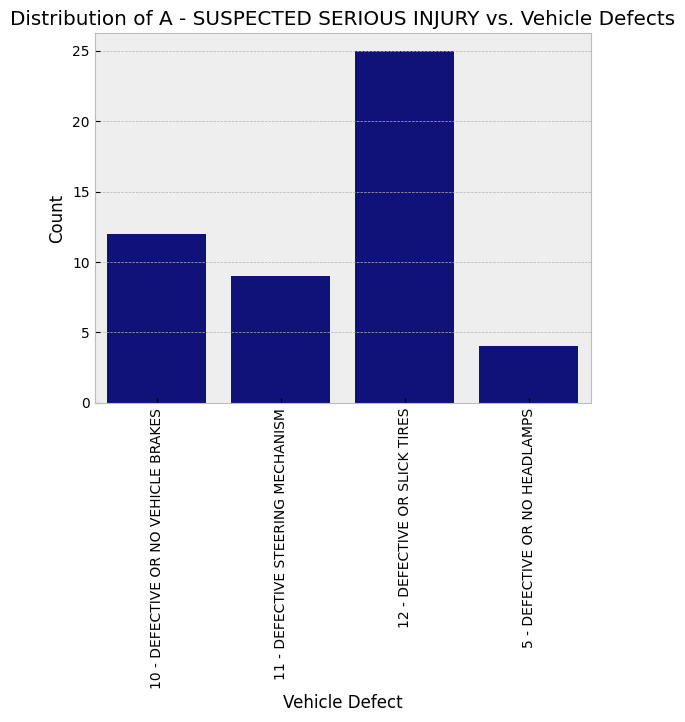

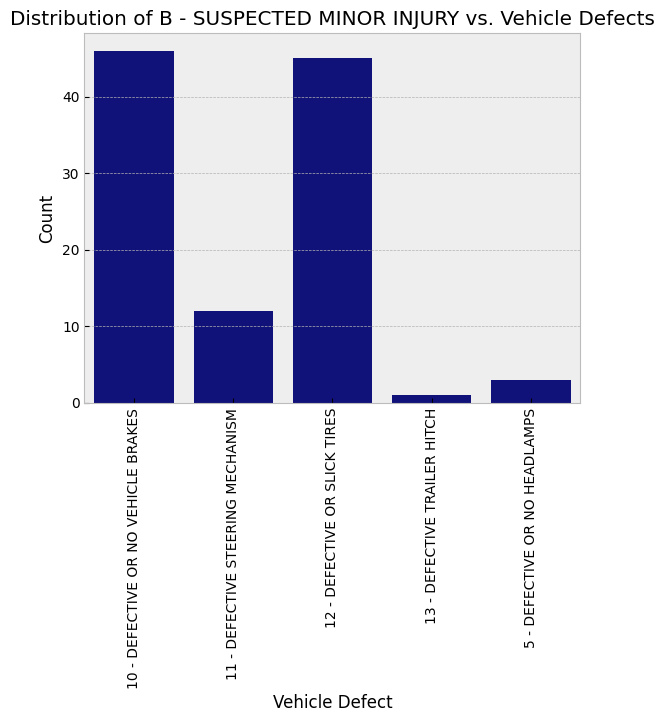

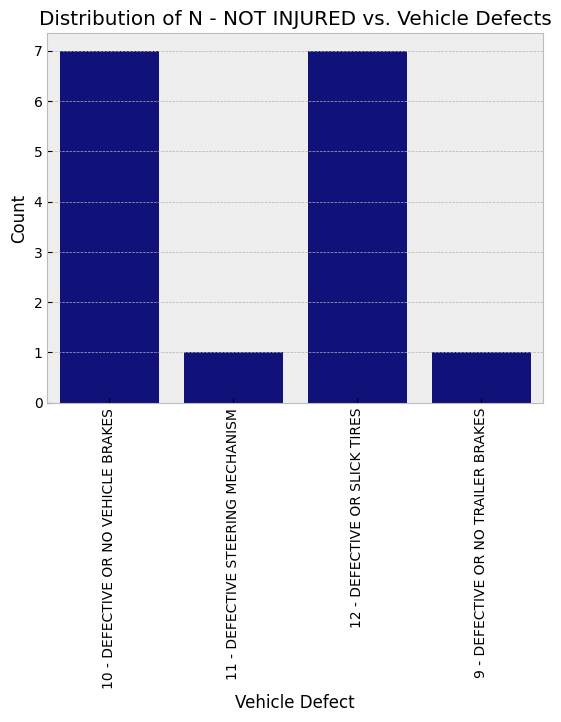

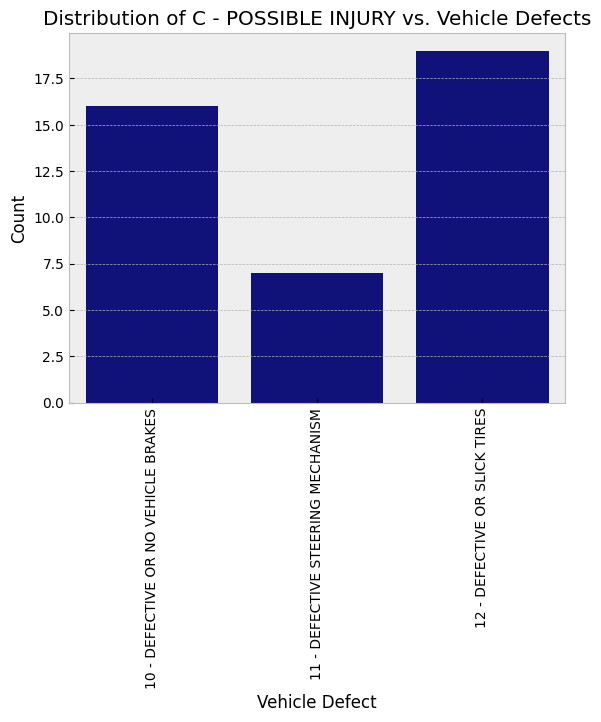

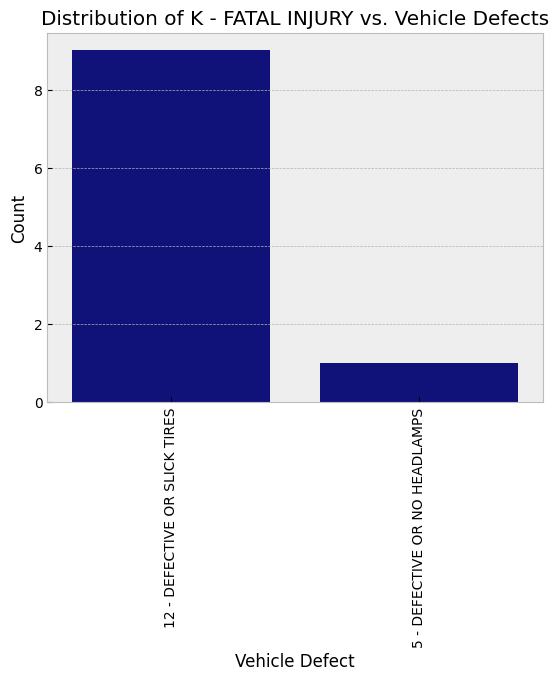

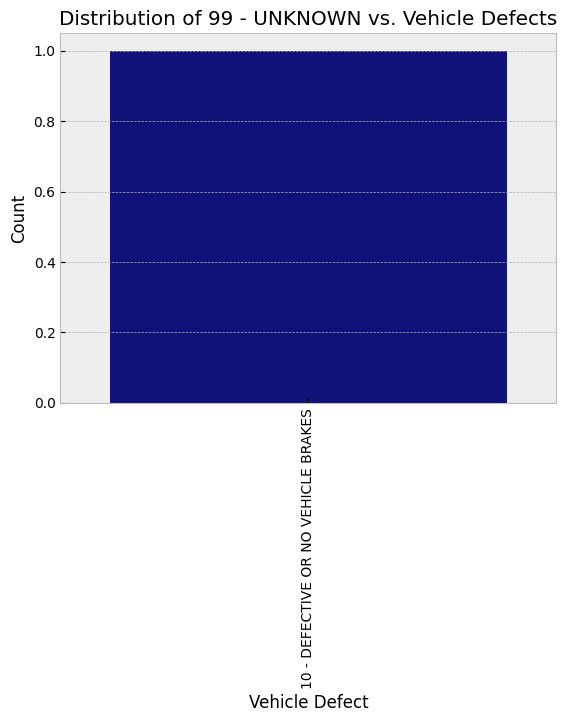

In [24]:
# Visualize injury severity by motorcycle defect type
for val in train.person_injury_severity.unique():
    defect_counts = train[train.person_injury_severity == val][train.vehicle_defect_1 != 'no data'][~train.vehicle_defect_1.str.startswith('98')].groupby(by=train.vehicle_defect_1)['person_injury_severity'].count()
    sns.barplot(x=defect_counts.index, y=defect_counts, color='darkblue')
    plt.title(f'Distribution of {val} vs. Vehicle Defects')
    plt.xlabel('Vehicle Defect')
    plt.xticks(rotation=90)
    plt.ylabel('Count')
    plt.show()

In [26]:
# Stat test variables using a chi2_contingency test
for val in train.person_injury_severity.unique():
    for vals in train[train.vehicle_defect_1 != 'no data'][~train.vehicle_defect_1.str.startswith('98')].vehicle_defect_1.unique():
        observed = pd.crosstab(train.vehicle_defect_1 == vals, train.person_injury_severity == val)
        stat, p, dof, a = stats.chi2_contingency(observed)
        alpha = 0.05
        if p < 0.05:
            print(f'\033[32m========== REJECT NULL HYPOTHESIS ==========\033[0m\n\033[35m{vals} {val}\nStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')
        else:
            print(f'\033[31m========== ACCEPT NULL HYPOTHESIS ==========\033[0m\n\033[35m{vals} {val}\nStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')

========== ACCEPT NULL HYPOTHESIS ==========
12 - DEFECTIVE OR SLICK TIRES A - SUSPECTED SERIOUS INJURY
Statistic: 0.6893423701688972
P-Value: 0.40638815508965587

========== REJECT NULL HYPOTHESIS ==========
10 - DEFECTIVE OR NO VEHICLE BRAKES A - SUSPECTED SERIOUS INJURY
Statistic: 6.583333148764481
P-Value: 0.010293795970949484

========== ACCEPT NULL HYPOTHESIS ==========
11 - DEFECTIVE STEERING MECHANISM A - SUSPECTED SERIOUS INJURY
Statistic: 0.02871417226234359
P-Value: 0.8654406792570991

========== ACCEPT NULL HYPOTHESIS ==========
5 - DEFECTIVE OR NO HEADLAMPS A - SUSPECTED SERIOUS INJURY
Statistic: 0.9997313648073423
P-Value: 0.3173755184471754

========== ACCEPT NULL HYPOTHESIS ==========
13 - DEFECTIVE TRAILER HITCH A - SUSPECTED SERIOUS INJURY
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
9 - DEFECTIVE OR NO TRAILER BRAKES A - SUSPECTED SERIOUS INJURY
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
12 - DEFECTIVE OR SL

<b><i>
    REJECT NULL HYPOTHESIS - EXCEPTION!
</i></b>

The condition of the motorcycle does make a significant difference in the injury severity of single motorcycle crashes in Texas.

(10 - DEFECTIVE OR NO VEHICLE BRAKES rejects all levels of injury except for no injuries, possible injuries, unknown)

---

<a id='question2'></a>
<h3><b><i>
    Question 2
</i></b></h3>
<li><a href='#questions'>Questions to Answer Top</a></li>

2. Is there a particular motorcycle brand?

<b>H$_0$:</b> The motorcycle brand does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

<b>H$_a$:</b> The motorcycle brand does make a significant difference in the injury severity of single motorcycle crashes in Texas.

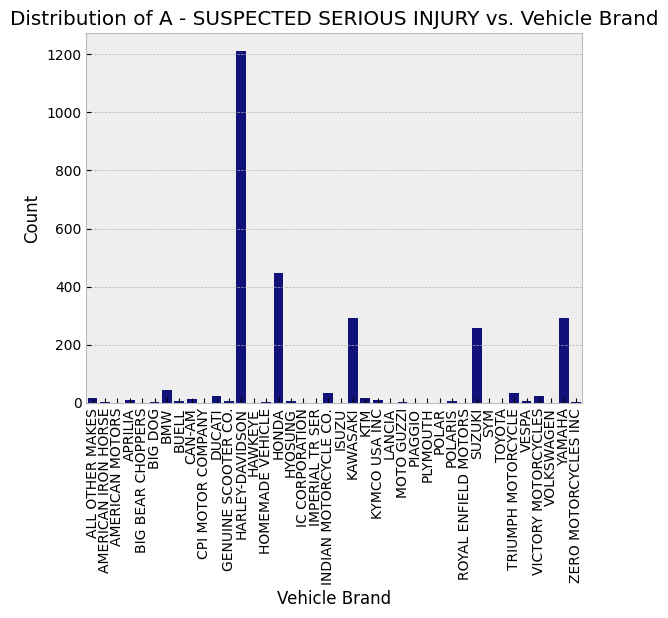

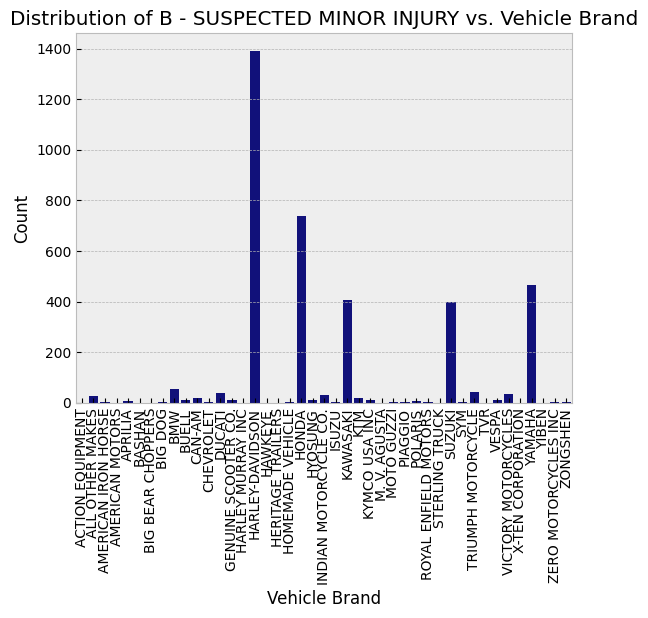

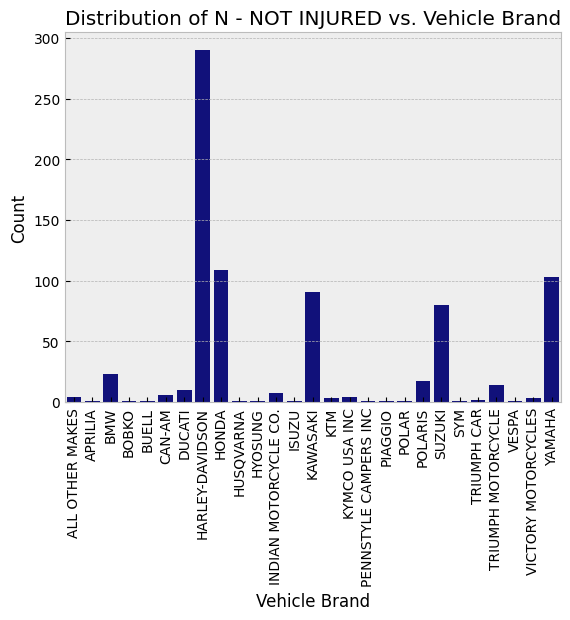

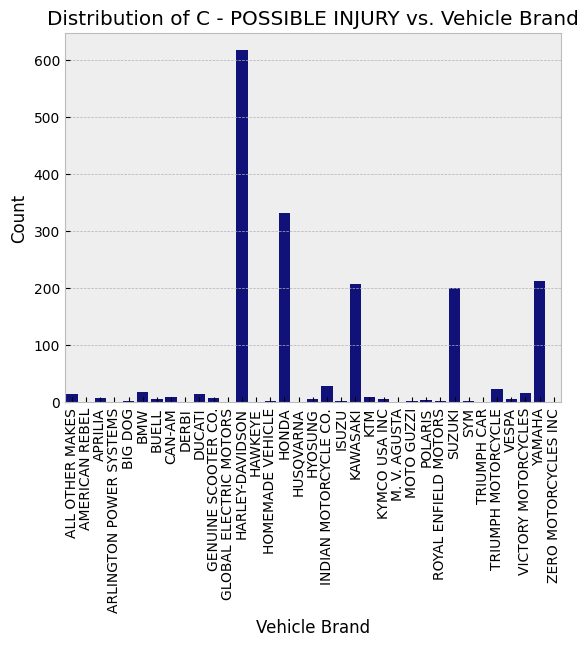

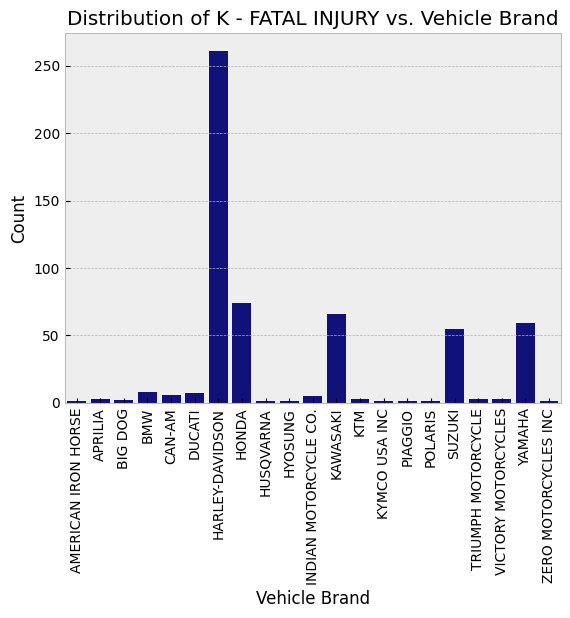

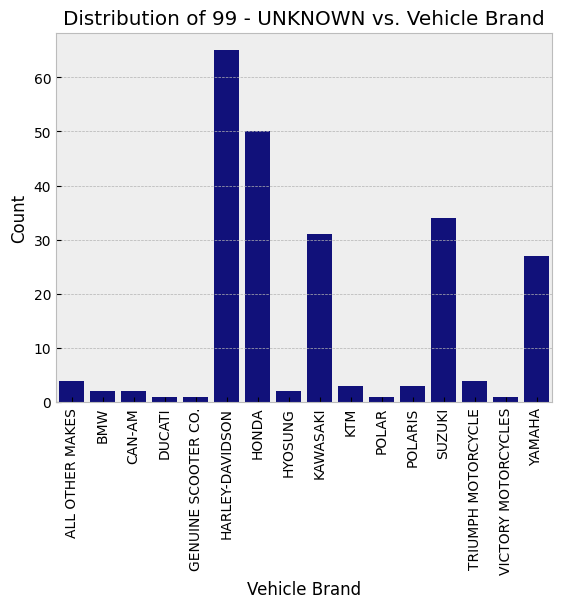

In [33]:
# Visualize injury severity by motorcycle brand
for val in train.person_injury_severity.unique():
    brand_counts = train[train.person_injury_severity == val][train.vehicle_make != 'no data'][~train.vehicle_make.str.startswith('UNKNOWN')][~train.vehicle_make.str.startswith('OTHER')].groupby(by=train.vehicle_make)['person_injury_severity'].count()
    sns.barplot(x=brand_counts.index, y=brand_counts, color='darkblue')
    plt.title(f'Distribution of {val} vs. Vehicle Brand')
    plt.xlabel('Vehicle Brand')
    plt.xticks(rotation=90)
    plt.ylabel('Count')
    plt.show()

In [35]:
# Stat test variables using a chi2_contingency test
for vals in train[train.vehicle_make != 'no data'][~train.vehicle_make.str.startswith('UNKNOWN')][~train.vehicle_make.str.startswith('OTHER')].vehicle_make.unique():
    for val in train.person_injury_severity.unique():
        observed = pd.crosstab(train.vehicle_make == vals, train.person_injury_severity == val)
        stat, p, dof, a = stats.chi2_contingency(observed)
        alpha = 0.05
        if p < 0.05:
            print(f'\033[32m========== REJECT NULL HYPOTHESIS ==========\033[0m\n\033[35m{vals} {val}\nStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')
        else:
            print(f'\033[31m========== ACCEPT NULL HYPOTHESIS ==========\033[0m\n\033[35m{vals} {val}\nStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')

========== ACCEPT NULL HYPOTHESIS ==========
GENUINE SCOOTER CO. A - SUSPECTED SERIOUS INJURY
Statistic: 0.3065833647762436
P-Value: 0.5797843762984034

========== ACCEPT NULL HYPOTHESIS ==========
GENUINE SCOOTER CO. B - SUSPECTED MINOR INJURY
Statistic: 0.5141898078838286
P-Value: 0.4733307235890656

========== ACCEPT NULL HYPOTHESIS ==========
GENUINE SCOOTER CO. N - NOT INJURED
Statistic: 1.4285994628423986
P-Value: 0.23199314291835033

========== ACCEPT NULL HYPOTHESIS ==========
GENUINE SCOOTER CO. C - POSSIBLE INJURY
Statistic: 1.4898379017605563
P-Value: 0.22224161200216833

========== ACCEPT NULL HYPOTHESIS ==========
GENUINE SCOOTER CO. K - FATAL INJURY
Statistic: 0.7770002396082105
P-Value: 0.3780601460776176

========== ACCEPT NULL HYPOTHESIS ==========
GENUINE SCOOTER CO. 99 - UNKNOWN
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
INDIAN MOTORCYCLE CO. A - SUSPECTED SERIOUS INJURY
Statistic: 0.845410478809203
P-Value: 0.35785394177031227

=======

========== ACCEPT NULL HYPOTHESIS ==========
KTM C - POSSIBLE INJURY
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
KTM K - FATAL INJURY
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
KTM 99 - UNKNOWN
Statistic: 0.8133045267168658
P-Value: 0.367145066445134

========== ACCEPT NULL HYPOTHESIS ==========
KYMCO USA INC A - SUSPECTED SERIOUS INJURY
Statistic: 0.21209342692323985
P-Value: 0.645131522261287

========== ACCEPT NULL HYPOTHESIS ==========
KYMCO USA INC B - SUSPECTED MINOR INJURY
Statistic: 0.12042422810377035
P-Value: 0.7285748346974608

========== ACCEPT NULL HYPOTHESIS ==========
KYMCO USA INC N - NOT INJURED
Statistic: 0.604387665505863
P-Value: 0.43690881294676

========== ACCEPT NULL HYPOTHESIS ==========
KYMCO USA INC C - POSSIBLE INJURY
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
KYMCO USA INC K - FATAL INJURY
Statistic: 0.02150983948068979
P-Value: 0.8833985521295844

========== ACCEPT N

========== ACCEPT NULL HYPOTHESIS ==========
VESPA 99 - UNKNOWN
Statistic: 0.02637985568249945
P-Value: 0.8709760935881316

========== ACCEPT NULL HYPOTHESIS ==========
BMW A - SUSPECTED SERIOUS INJURY
Statistic: 0.07571368843778585
P-Value: 0.7831923912430201

========== ACCEPT NULL HYPOTHESIS ==========
BMW B - SUSPECTED MINOR INJURY
Statistic: 0.1779765395703639
P-Value: 0.6731179682072328

========== REJECT NULL HYPOTHESIS ==========
BMW N - NOT INJURED
Statistic: 11.445558290811514
P-Value: 0.0007166509809607567

========== ACCEPT NULL HYPOTHESIS ==========
BMW C - POSSIBLE INJURY
Statistic: 2.9112396203972386
P-Value: 0.08796423948360427

========== ACCEPT NULL HYPOTHESIS ==========
BMW K - FATAL INJURY
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
BMW 99 - UNKNOWN
Statistic: 0.4864522932231491
P-Value: 0.48551413777110275

========== ACCEPT NULL HYPOTHESIS ==========
DUCATI A - SUSPECTED SERIOUS INJURY
Statistic: 0.6413239435222337
P-Value: 0.42323178

========== ACCEPT NULL HYPOTHESIS ==========
ISUZU 99 - UNKNOWN
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
STERLING TRUCK A - SUSPECTED SERIOUS INJURY
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
STERLING TRUCK B - SUSPECTED MINOR INJURY
Statistic: 0.06035256118076597
P-Value: 0.8059395685156305

========== ACCEPT NULL HYPOTHESIS ==========
STERLING TRUCK N - NOT INJURED
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
STERLING TRUCK C - POSSIBLE INJURY
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
STERLING TRUCK K - FATAL INJURY
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
STERLING TRUCK 99 - UNKNOWN
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
HAWKEYE A - SUSPECTED SERIOUS INJURY
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
HAWKEYE B - SUSPECTED MINOR INJURY
Statistic: 0.0
P-Value: 1.0



========== ACCEPT NULL HYPOTHESIS ==========
AMERICAN MOTORS N - NOT INJURED
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
AMERICAN MOTORS C - POSSIBLE INJURY
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
AMERICAN MOTORS K - FATAL INJURY
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
AMERICAN MOTORS 99 - UNKNOWN
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
GLOBAL ELECTRIC MOTORS A - SUSPECTED SERIOUS INJURY
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
GLOBAL ELECTRIC MOTORS B - SUSPECTED MINOR INJURY
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
GLOBAL ELECTRIC MOTORS N - NOT INJURED
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
GLOBAL ELECTRIC MOTORS C - POSSIBLE INJURY
Statistic: 0.6977991747907308
P-Value: 0.4035241929933099

========== ACCEPT NULL HYPOTHESIS ==========
GLOBAL ELECTRIC MOT

========== ACCEPT NULL HYPOTHESIS ==========
M. V. AGUSTA A - SUSPECTED SERIOUS INJURY
Statistic: 0.008368998798492771
P-Value: 0.927109423723679

========== ACCEPT NULL HYPOTHESIS ==========
M. V. AGUSTA B - SUSPECTED MINOR INJURY
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
M. V. AGUSTA N - NOT INJURED
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
M. V. AGUSTA C - POSSIBLE INJURY
Statistic: 0.06759121660751782
P-Value: 0.794876803311445

========== ACCEPT NULL HYPOTHESIS ==========
M. V. AGUSTA K - FATAL INJURY
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
M. V. AGUSTA 99 - UNKNOWN
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
HERITAGE TRAILERS A - SUSPECTED SERIOUS INJURY
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
HERITAGE TRAILERS B - SUSPECTED MINOR INJURY
Statistic: 0.06035256118076597
P-Value: 0.8059395685156305

========== ACCEPT NULL H

<b><i>
    REJECT NULL HYPOTHESIS FOR SOME!
</i></b>

The motorcycle brand does make a significant difference in the injury severity of single motorcycle crashes in Texas.


- HONDA
- HARLEY-DAVIDSON

<div style='background-color:orange'>
<a id='misc'></a>
    <b><u><i><h1 style='text-align:center ; padding-top:5px'>
        Miscellaneous
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a>
    </li>
</div>